# Crop Type Classifier
**Objective**
: To develop an Artificial Neural Network (ANN) model that classifies the most appropriate crop type using soil and climate features—Nitrogen (N), Phosphorus (P), Potassium (K), pH, Rainfall, and Temperature. By training on the Kaggle Crop Recommendation Dataset, the model aims to support precision agriculture through scalable, automated crop recommendations tailored to environmental inputs.

# Dataset
This dataset, sourced from Kaggle, provides essential soil and climate parameters—Nitrogen (N), Phosphorus (P), Potassium (K), pH, Rainfall, and Temperature—to recommend the most suitable crop type for a given region. It supports precision agriculture by enabling machine learning models to optimize crop selection based on environmental conditions.

### Key Features:

- Nitrogen (N): Soil nitrogen content (essential for plant growth and chlorophyll production)
- Phosphorus (P): Soil phosphorus content (important for root development and flowering)
- Potassium (K): Soil potassium content (crucial for water regulation and disease resistance)
- pH: Soil pH level (affecting nutrient availability to plants)
- Rainfall: Average rainfall amount (in mm) influencing water availabilit
- Temperature: Average temperature (in °C) impacting crop growth cycles
- Crop: Recommended crop type based on the given soil and weather parameters

In [54]:
# Importing essential libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

In [55]:
crop_data=pd.read_csv("./Crop_Recommendation.csv")
crop_data.head()

,Unnamed: 0,Crop,N,P,K,pH,rainfall,temperature
0,10182,barley,70,40,45,5.54,75.32,22.676000
1,16280,sunflower,50,60,30,5.54,297.66,29.566667
2,54944,sweetpotato,90,20,120,5.02,689.88,29.037273
3,98212,rice,80,40,40,5.66,297.66,29.566667
4,52108,soyabean,20,60,20,5.38,1011.49,30.430000


In [56]:
print("Shape of Datset:",crop_data.shape)

Shape of Datset: (18079, 8)


In [57]:
print(crop_data.describe())

         Unnamed: 0             N             P             K            pH  \
count  18079.000000  18079.000000  18079.000000  18079.000000  18079.000000   
mean   49799.491565     72.683500     43.489408     41.607666      5.581247   
std    28625.445698     40.019864     14.051089     27.584765      0.477354   
min        8.000000     10.000000     10.000000     10.000000      3.820000   
25%    25037.000000     50.000000     40.000000     20.000000      5.340000   
50%    49799.000000     80.000000     40.000000     30.000000      5.500000   
75%    74418.000000     80.000000     60.000000     50.000000      5.680000   
max    99842.000000    180.000000    125.000000    200.000000      7.000000   

           rainfall   temperature  
count  18079.000000  18079.000000  
mean     661.896078     26.496760  
std      578.161909      4.970138  
min        3.274569      1.180000  
25%      127.680000     22.890909  
50%      579.750000     26.736364  
75%     1037.320000     29.186364  


In [58]:
crop_data.isnull().sum()

Unnamed: 0     0
Crop           0
N              0
P              0
K              0
pH             0
rainfall       0
temperature    0
dtype: int64

In [59]:
crop_data.duplicated().sum()

0

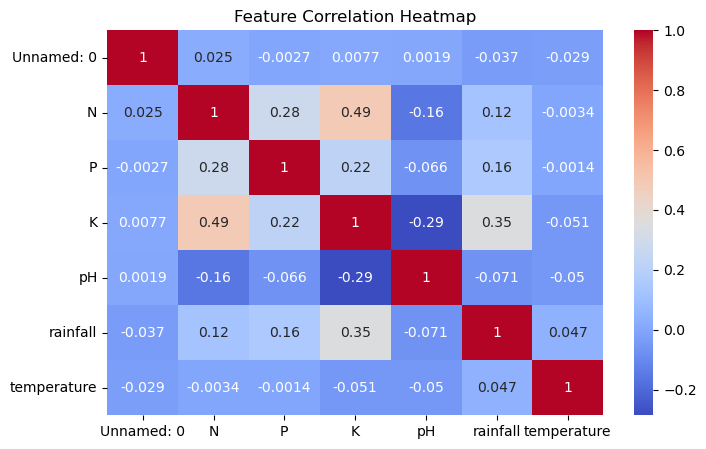

In [60]:
cor_mat=crop_data.select_dtypes(include='number').corr()
plt.figure(figsize=(8,5))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [61]:
# Encoding crop labels to numeric format
label_enc=LabelEncoder()
crop_data['crop_label']=label_enc.fit_transform(crop_data['Crop'])

In [62]:
# Checking the distribution of crop labels 
print("Original Crop Label Distribution:\n")
print(crop_data['Crop'].value_counts())

print("\nEncoded Crop Label Distribution:\n")
print(crop_data['crop_label'].value_counts())

Original Crop Label Distribution:

Crop
rice           2245
maize          1976
moong          1327
wheat          1287
rapeseed       1118
potato         1083
jowar          1055
onion          1047
sunflower       737
barley          654
cotton          613
sweetpotato     576
ragi            557
horsegram       545
turmeric        528
banana          507
coriander       473
soyabean        442
garlic          415
jute            211
blackpepper     119
mango            66
tomato           59
papaya           56
brinjal          55
cardamom         54
ladyfinger       41
orange           27
cabbage          26
pineapple        26
cauliflower      23
cucumber         20
grapes           19
jackfruit        18
drumstick        17
bottlegourd      13
radish           13
bittergourd      11
blackgram        11
pumpkin           9
Name: count, dtype: int64

Encoded Crop Label Distribution:

crop_label
33    2245
21    1976
23    1327
39    1287
32    1118
28    1083
18    1055
24    1047


In [63]:
# Feature and label separation
X_features=crop_data.drop(['Crop','crop_label'],axis=1)
y_labels = crop_data['crop_label']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.2, random_state=42, stratify=y_labels
)


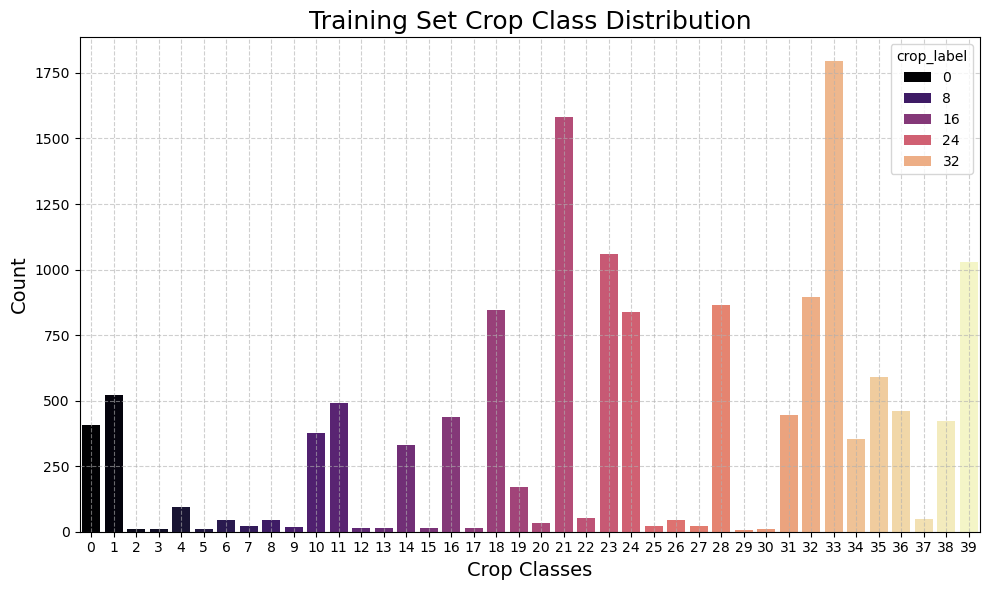

In [64]:
# Visualizing the distribution of classes in training set
plt.figure(figsize=(10,6))
sns.countplot(x=y_train,hue=y_train, palette="magma")
plt.title("Training Set Crop Class Distribution", fontsize=18)
plt.xlabel("Crop Classes", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [65]:
# Feature Scaling
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [66]:
# Model Architecture
model=Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_labels)),activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [67]:
history= model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3852 - loss: 2.4083 - val_accuracy: 0.8759 - val_loss: 0.4452
Epoch 2/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8558 - loss: 0.4879 - val_accuracy: 0.9098 - val_loss: 0.2407
Epoch 3/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8898 - loss: 0.3001 - val_accuracy: 0.9129 - val_loss: 0.1956
Epoch 4/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9032 - loss: 0.2474 - val_accuracy: 0.9195 - val_loss: 0.1800
Epoch 5/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9081 - loss: 0.2160 - val_accuracy: 0.9202 - val_loss: 0.1734
Epoch 6/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9126 - loss: 0.1974 - val_accuracy: 0.9205 - val_loss: 0.1748
Epoch 7/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9149 - loss: 0.1946 - val_accuracy: 0.9177 - val_loss: 0.1706
Epoch 8/100
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9233 - loss: 0.1865 - val_accu

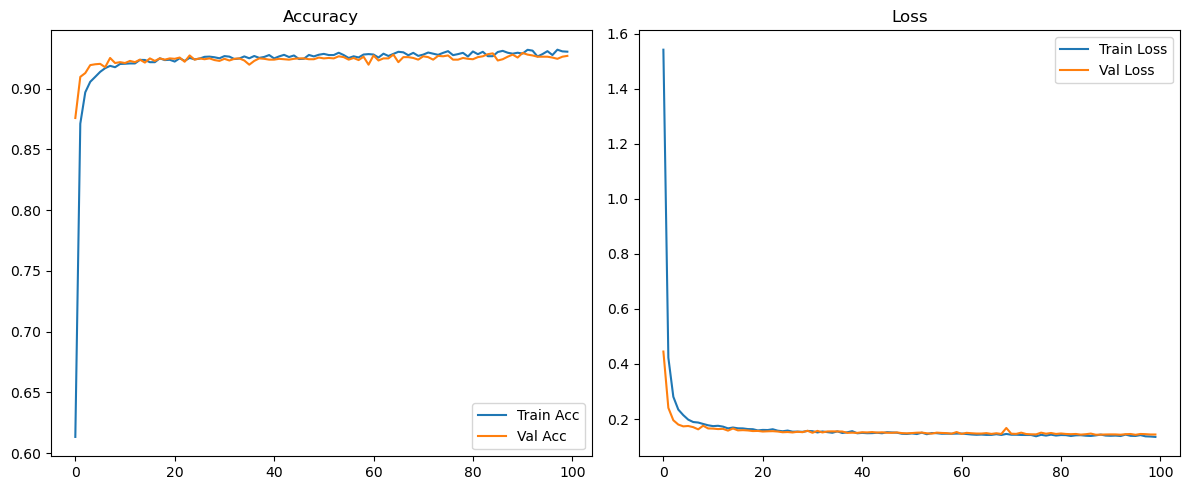

In [68]:
# 📈 Plot Training History
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       131
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00         3
           6       0.73      1.00      0.85        11
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        95
          11       1.00      1.00      1.00       123
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00        83
          15       1.00      1.00      1.00         4
          16    

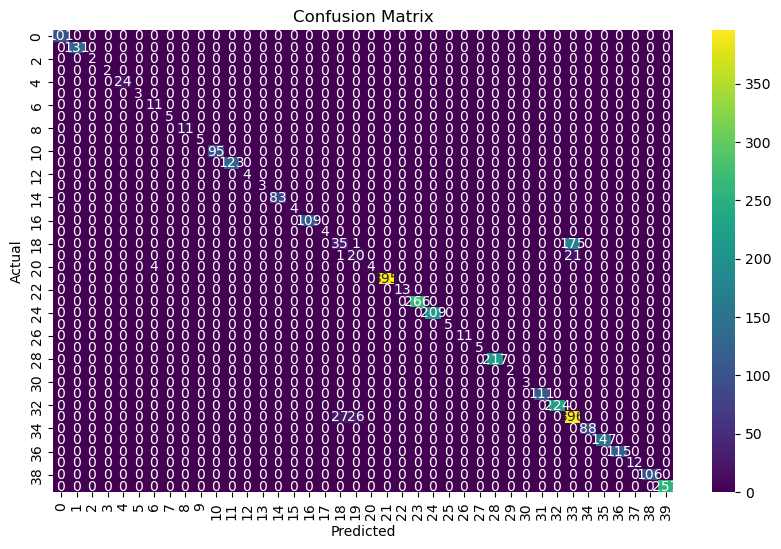

In [69]:

# 🧪 Evaluation
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Extensions: Ideas to Expand the Project**

Integrate weather forecast APIs to enable dynamic crop recommendations based on real-time conditions.

Deploy the model as a web app using Flask or Streamlit for farmers or agronomists to input soil/weather data and receive crop suggestions.

**Tools: Libraries and Frameworks**
Data Handling: pandas, numpy, scikit-learn

Modeling: tensorflow.keras

Visualization: matplotlib, seaborn

Data Sourcing: Kaggle